In [1]:
import plaid
import os
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
# YOUR CODE HERE
# Create client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

### 2. Generate a public token

In [6]:
# YOUR CODE HERE
# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [7]:
# YOUR CODE HERE
# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
# Store access token as variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [8]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'rnBK95AB8zuZxZ3eeKLxcgNbJLG86WTlJokRk',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'zXjA95RjyPtyWykqqErWcn3elNpEkZFoNqXbd',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'BbVv951VeGcjmjEBBGemtMZBLrR6KahwMZxo5',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [9]:
# YOUR CODE HERE
# Get transactions for institution for specific date range
start_date= '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)

### 2. Print the categories for each transaction

In [10]:
# YOUR CODE HERE
for transactions in transaction_response['transactions']:
     print(json.dumps(transactions['category'], indent=None, sort_keys=True))

["Travel", "Car Service", "Ride Share"]
["Food and Drink", "Restaurants"]
["Payment"]
["Food and Drink", "Restaurants"]
["Shops", "Sporting Goods"]
["Payment", "Credit Card"]
["Travel", "Car Service", "Ride Share"]
["Transfer", "Debit"]
["Transfer", "Deposit"]
["Recreation", "Gyms and Fitness Centers"]
["Travel", "Airlines and Aviation Services"]
["Food and Drink", "Restaurants"]
["Food and Drink", "Restaurants", "Coffee Shop"]
["Food and Drink", "Restaurants"]
["Transfer", "Credit"]
["Travel", "Airlines and Aviation Services"]
["Travel", "Car Service", "Ride Share"]
["Food and Drink", "Restaurants"]
["Payment"]
["Food and Drink", "Restaurants"]
["Shops", "Sporting Goods"]
["Payment", "Credit Card"]
["Travel", "Car Service", "Ride Share"]
["Transfer", "Debit"]
["Transfer", "Deposit"]
["Recreation", "Gyms and Fitness Centers"]
["Travel", "Airlines and Aviation Services"]
["Food and Drink", "Restaurants"]
["Food and Drink", "Restaurants", "Coffee Shop"]
["Food and Drink", "Restaurants"]


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [11]:
# YOUR CODE HERE
df = pd.DataFrame(transaction_response['transactions'], columns = ['date', 'name','amount','category'])
df[['category1','category2','category3']] = pd.DataFrame(df.category.values.tolist(), index= df.index)
df_new=df.drop(columns=['category','category2','category3'])
df_new

,date,name,amount,category1
0,2019-10-01,Uber 072515 SF**POOL**,6.33,Travel
1,2019-09-28,Tectra Inc,500.00,Food and Drink
2,2019-09-27,AUTOMATIC PAYMENT - THANK,2078.50,Payment
3,2019-09-27,KFC,500.00,Food and Drink
4,2019-09-27,Madison Bicycle Shop,500.00,Shops
5,2019-09-18,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
6,2019-09-18,Uber 063015 SF**POOL**,5.40,Travel
7,2019-09-17,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
8,2019-09-17,CD DEPOSIT .INITIAL.,1000.00,Transfer
9,2019-09-16,Touchstone Climbing,78.50,Recreation


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [12]:
# YOUR CODE HERE
df_new.dtypes

date          object
name          object
amount       float64
category1     object
dtype: object

In [13]:
# Use the `as_type` function to convert
df_new['date'] = pd.to_datetime(df_new['date'])
df_new['amount'] = df_new['amount'].astype('float')
df_new.dtypes

date         datetime64[ns]
name                 object
amount              float64
category1            object
dtype: object

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [14]:
# Get income for institution for specific date range
#start_date_inc = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-365))
#end_date_inc = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get income for date range
income_response = client.Income.get(access_token)
income_response

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'W7rwtgOUgaRxo2N'}

In [15]:
# 1. Determine the previous year's gross income and print the results
print(f" The previous years gross income is ${income_response['income']['last_year_income_before_tax']}.")
# 2. Determine the current monthly income and print the results
print(f" The current monthly income is ${income_response['income']['income_streams'][0]['monthly_income']}.")
# 3. Determine the projected yearly income and print the results
print(f" The projected yearly income is ${income_response['income']['projected_yearly_income_before_tax']}.")

 The previous years gross income is $7285.
 The current monthly income is $500.
 The projected yearly income is $7389.


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

category1
Food and Drink     3317.19
Payment            6310.50
Recreation          235.50
Shops              1500.00
Transfer          20537.34
Travel               41.52
Name: amount, dtype: float64

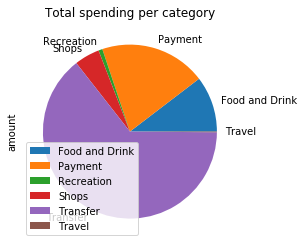

In [16]:
# YOUR CODE HERE
# 1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
#df_new_positive=df_new[df_new['amount']>0]
#df_new_positive
total_spending_per_category = df_new.groupby('category1')['amount'].sum()
total_spending_per_category.plot(kind='pie',title='Total spending per category',legend=True)
total_spending_per_category

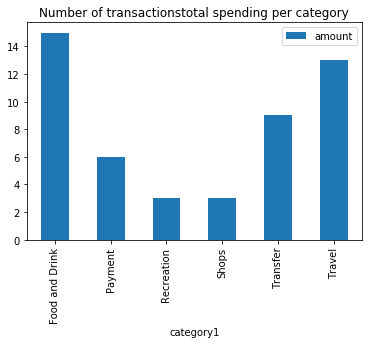

In [17]:
# 2. Generate a bar chart with the number of transactionstotal spending per category for each category
number_spending_per_category = df_new.groupby('category1')['amount'].count()
number_spending_per_category.plot(kind='bar',title='Number of transactionstotal spending per category',legend=True)

### Calculate the expenses per month

In [18]:
# YOUR CODE HERE
# 3. Calulate the expenses per month
df_new.index=pd.to_datetime(df_new['date'])
df_new

,date,name,amount,category1
date,,,,
2019-10-01,2019-10-01,Uber 072515 SF**POOL**,6.33,Travel
2019-09-28,2019-09-28,Tectra Inc,500.00,Food and Drink
2019-09-27,2019-09-27,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2019-09-27,2019-09-27,KFC,500.00,Food and Drink
2019-09-27,2019-09-27,Madison Bicycle Shop,500.00,Shops
2019-09-18,2019-09-18,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
2019-09-18,2019-09-18,Uber 063015 SF**POOL**,5.40,Travel
2019-09-17,2019-09-17,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
2019-09-17,2019-09-17,CD DEPOSIT .INITIAL.,1000.00,Transfer


In [19]:
df_new_grouped_by_month=df_new.groupby([df_new.index.month]).sum()
df_new_grouped_by_month

,amount
date,
7,10645.24
8,10645.24
9,10645.24
10,6.33


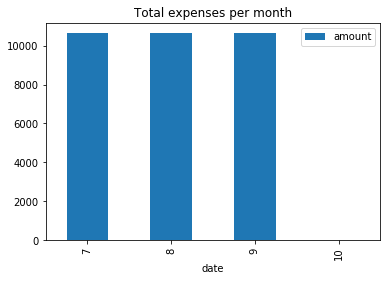

In [20]:
# 4. Plot the total expenses per month
df_new_grouped_by_month.plot(kind='bar',title='Total expenses per month')